In [67]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold

In [68]:
# import red wine data
df = pd.read_csv('winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [69]:
# make high quality column then drop quality column
df['high quality'] = np.where(df['quality']>6, 1, 0)
df.drop(['quality'], axis=1, inplace=True)
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,high quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [70]:
# look for missing data --> there is none
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
high quality            0
dtype: int64

In [71]:
# split into training and test (70/30)
X = df.copy().drop('high quality', axis=1)
y = df['high quality']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

# take a look at X
X.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [72]:
# take a look at y
y.describe()

count    1599.000000
mean        0.135710
std         0.342587
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: high quality, dtype: float64

In [73]:
# scale the data
X_train_sc = scale(X_train)
y_train_sc = scale(y_train)
X_test_sc = scale(X_test)
y_test_sc = scale(y_test)

In [74]:
# build an SVM
model = SVC(kernel='rbf', random_state = 42)
model.fit(X_train_sc, y_train)

SVC(random_state=42)

/Users/catherinesmith/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


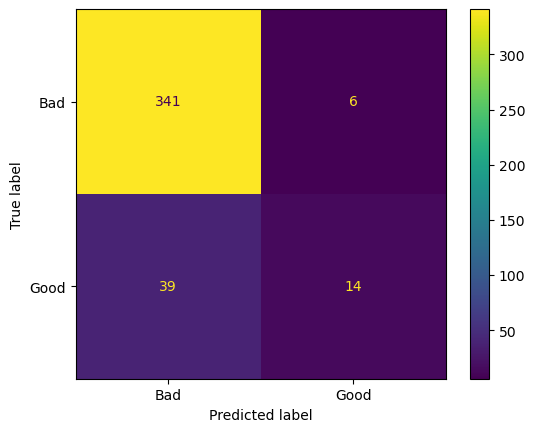

In [75]:
# confusion matrix
plot_confusion_matrix(model,
X_test_sc,
y_test,
values_format='d',
display_labels = ['Bad', 'Good'])

In [80]:
# optimize the SVM model by cross-validation
param_grid  = [
    {'C':[0.5,1,10,100],
    'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001]
    }
]

optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    scoring = 'accuracy',
    verbose = 2
)

optimal_params.fit(X_train_sc, y_train)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END .................................C=0.5, gamma=scale; total time=   0.0s
[CV] END .................................C=0.5, gamma=scale; total time=   0.0s
[CV] END .................................C=0.5, gamma=scale; total time=   0.0s
[CV] END .................................C=0.5, gamma=scale; total time=   0.0s
[CV] END .................................C=0.5, gamma=scale; total time=   0.0s
[CV] END .....................................C=0.5, gamma=1; total time=   0.1s
[CV] END .....................................C=0.5, gamma=1; total time=   0.1s
[CV] END .....................................C=0.5, gamma=1; total time=   0.1s
[CV] END .....................................C=0.5, gamma=1; total time=   0.1s
[CV] END .....................................C=0.5, gamma=1; total time=   0.1s
[CV] END ...................................C=0.5, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.5, 1, 10, 100],
                          'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001]}],
             scoring='accuracy', verbose=2)

In [81]:
# see optimization results
print(optimal_params.best_params_)

{'C': 1, 'gamma': 1}


In [82]:
# try optimized model
model = SVC(kernel='rbf', random_state = 42, gamma = 1)
model.fit(X_train_sc, y_train)


SVC(gamma=1, random_state=42)

/Users/catherinesmith/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


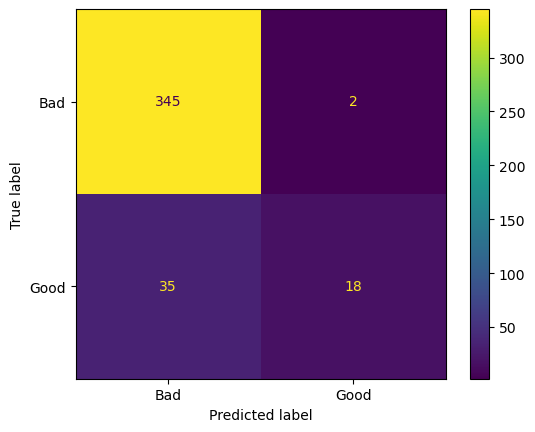

In [83]:
# confusion matrix
plot_confusion_matrix(model,
X_test_sc,
y_test,
values_format='d',
display_labels = ['Bad', 'Good'])